In [1]:
!git clone https://github.com/Parthiee/Gesture-Recognition-for-Sign-Language

Cloning into 'Gesture-Recognition-for-Sign-Language'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 5), reused 31 (delta 3), pack-reused 0
Receiving objects: 100% (35/35), 30.54 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
import pandas as pd

train = pd.read_csv('/content/Gesture-Recognition-for-Sign-Language/data/sign_mnist_train.csv')
test = pd.read_csv('/content/Gesture-Recognition-for-Sign-Language/data/sign_mnist_test.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
trainX = train.drop(columns=['label'], axis=0)
trainY = train['label']

testX = test.drop(columns=['label'], axis=0)
testY = test['label']

In [4]:
import keras
from keras.utils import to_categorical


trainY = to_categorical(trainY)
testY = to_categorical(testY)
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

Xtrain = trainX.values  # Assuming trainX is a DataFrame
Ytrain = trainY  # Assuming trainY is a DataFrame


Xtest = testX.values  # Assuming trainX is a DataFrame
Ytest = testY  # Assuming trainY is a DataFrame

# Reshape X to represent images
Xtrain = np.array([np.reshape(x, (28, 28)) for x in Xtrain])
Xtest = np.array([np.reshape(x, (28, 28)) for x in Xtest])




# Convert arrays to TensorFlow tensors
X_train = tf.convert_to_tensor(Xtrain)
X_test = tf.convert_to_tensor(Xtest)
y_train = tf.convert_to_tensor(Ytrain)
y_test = tf.convert_to_tensor(Ytest)



In [6]:
X_train= X_train/255

X_test= X_test/255


In [7]:
op = len(test['label'].unique())

In [25]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu' , input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2, strides=2 ))
model.add(layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(op+1, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

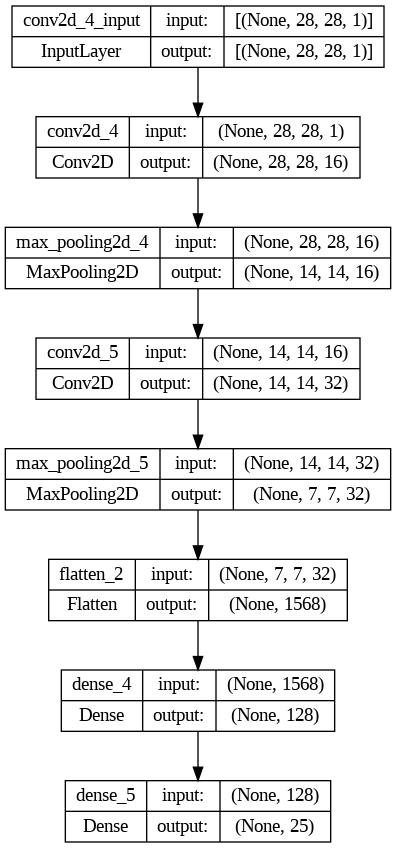

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# SGD

In [10]:
import keras

model.compile(optimizer= 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history_sgd = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                     callbacks=[early_stopping])

Epoch 1/10
858/858 [==============================] - 20s 23ms/step - loss: 3.1057 - accuracy: 0.0939 - val_loss: 2.8076 - val_accuracy: 0.1906
Epoch 2/10
858/858 [==============================] - 20s 23ms/step - loss: 1.9771 - accuracy: 0.3920 - val_loss: 1.4725 - val_accuracy: 0.5289
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 1.0275 - accuracy: 0.6783 - val_loss: 0.9421 - val_accuracy: 0.7036
Epoch 4/10
858/858 [==============================] - 23s 27ms/step - loss: 0.5780 - accuracy: 0.8192 - val_loss: 0.7240 - val_accuracy: 0.7593
Epoch 5/10
858/858 [==============================] - 20s 23ms/step - loss: 0.3154 - accuracy: 0.9081 - val_loss: 0.6313 - val_accuracy: 0.8065
Epoch 6/10
858/858 [==============================] - 29s 34ms/step - loss: 0.1743 - accuracy: 0.9535 - val_loss: 0.6099 - val_accuracy: 0.8277
Epoch 7/10
858/858 [==============================] - 17s 20ms/step - loss: 0.0991 - accuracy: 0.9784 - val_loss: 0.5350 - val_accuracy:

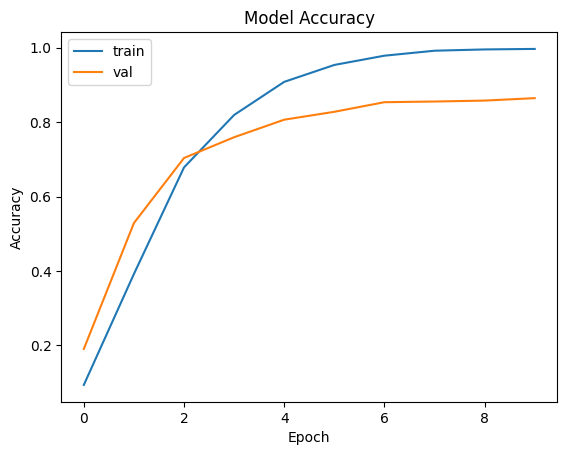

In [15]:
import keras
from matplotlib import pyplot as plt

plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/SGD/SGD_ACCURACY')
plt.show()


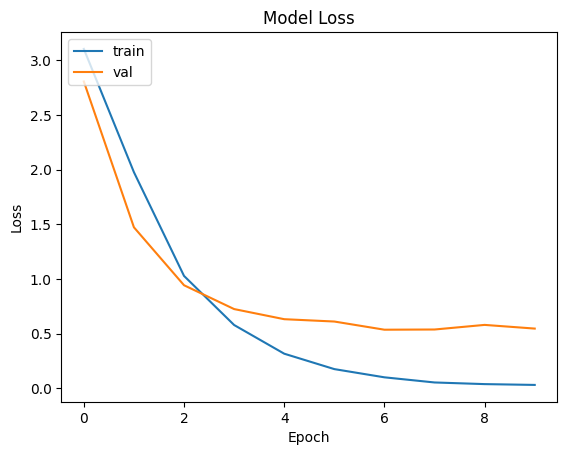

In [16]:
import keras
from matplotlib import pyplot as plt

plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/SGD/SGD_LOSS.jpg')
plt.show()


In [17]:
model.save('/content/SGD/sgd.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Adam

In [19]:
import keras
model.compile(optimizer= 'adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
history_adam = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),
                     callbacks=[early_stopping])

Epoch 1/30
858/858 [==============================] - 19s 21ms/step - loss: 0.8980 - accuracy: 0.7395 - val_loss: 0.4871 - val_accuracy: 0.8477
Epoch 2/30
858/858 [==============================] - 19s 23ms/step - loss: 0.0511 - accuracy: 0.9909 - val_loss: 0.6112 - val_accuracy: 0.8560
Epoch 3/30
858/858 [==============================] - 18s 21ms/step - loss: 0.0179 - accuracy: 0.9964 - val_loss: 0.5448 - val_accuracy: 0.8689
Epoch 4/30
858/858 [==============================] - 20s 23ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.6472 - val_accuracy: 0.8588
Epoch 4: early stopping


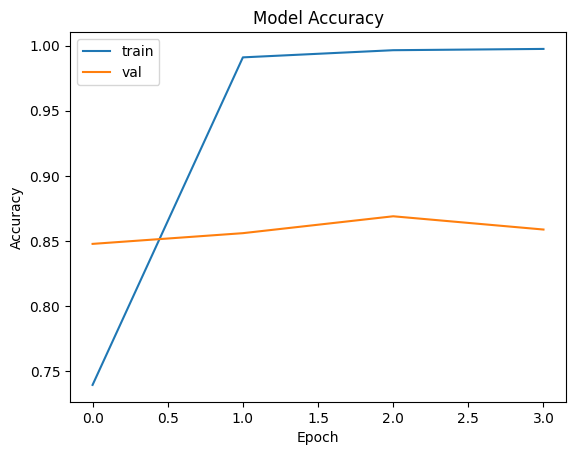

In [22]:
import keras
from matplotlib import pyplot as plt

plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/ADAM/ADAM_ACCURACY.jpg')
plt.show()


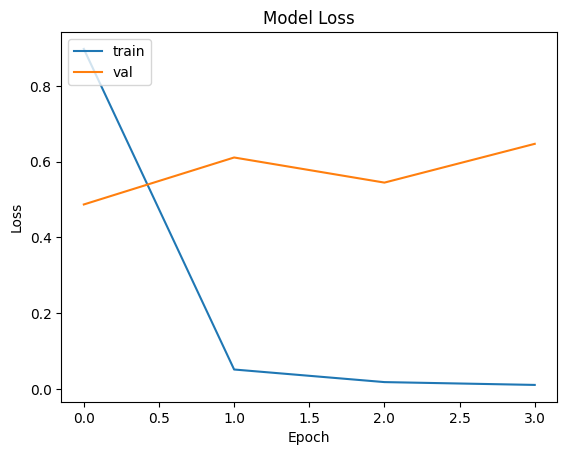

In [23]:
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/ADAM/ADAM_LOSS.jpg')
plt.show()


In [24]:
model.save('/content/ADAM/adam.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Adagrad

In [26]:
import keras
model.compile(optimizer= 'adagrad',
             loss='categorical_crossentropy',
              metrics=['accuracy'])



In [27]:
history_ada = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),
                     callbacks=[early_stopping])

Epoch 1/30
858/858 [==============================] - 17s 20ms/step - loss: 3.1985 - accuracy: 0.0536 - val_loss: 3.2085 - val_accuracy: 0.0491
Epoch 2/30
858/858 [==============================] - 17s 20ms/step - loss: 3.1662 - accuracy: 0.0949 - val_loss: 3.1838 - val_accuracy: 0.0653
Epoch 3/30
858/858 [==============================] - 18s 21ms/step - loss: 3.1251 - accuracy: 0.1174 - val_loss: 3.1335 - val_accuracy: 0.1111
Epoch 4/30
858/858 [==============================] - 16s 19ms/step - loss: 3.0450 - accuracy: 0.1634 - val_loss: 3.0302 - val_accuracy: 0.1506
Epoch 5/30
858/858 [==============================] - 17s 20ms/step - loss: 2.8847 - accuracy: 0.2399 - val_loss: 2.8175 - val_accuracy: 0.2533
Epoch 6/30
858/858 [==============================] - 18s 21ms/step - loss: 2.6552 - accuracy: 0.3040 - val_loss: 2.6129 - val_accuracy: 0.2863
Epoch 7/30
858/858 [==============================] - 18s 20ms/step - loss: 2.4294 - accuracy: 0.3630 - val_loss: 2.3946 - val_accuracy:

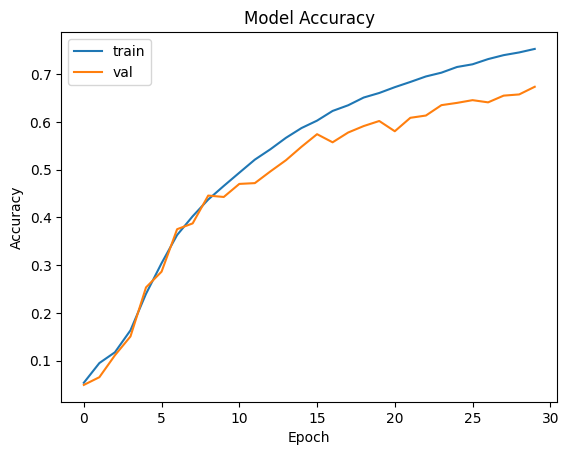

In [28]:
import keras
from matplotlib import pyplot as plt

plt.plot(history_ada.history['accuracy'])
plt.plot(history_ada.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/ADA/ADA_ACCURACY.jpg')
plt.show()


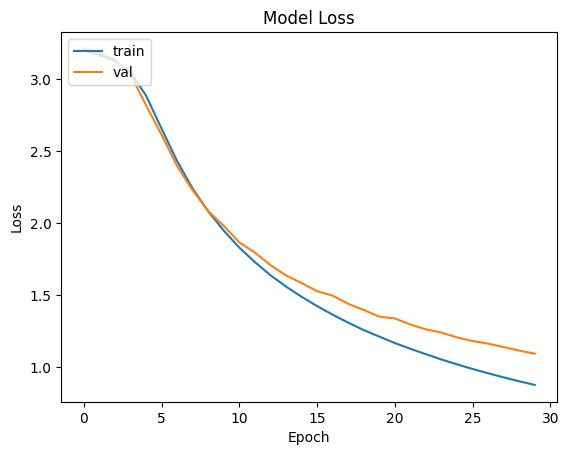

In [29]:
plt.plot(history_ada.history['loss'])
plt.plot(history_ada.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/content/ADA/ADA_LOSS.jpg')
plt.show()


In [30]:
model.save('/content/ADA/ada.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# SVM

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', probability=True)


clf.fit(trainX, train['label'].values)

SVC(kernel='linear', probability=True)

In [32]:
pred = clf.predict([x for x in testX.values])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
pred = list(pred)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

acc = accuracy_score(test['label'].values, pred)

print(f"Accuracy : {acc}")

mat = confusion_matrix(test['label'].values, pred)
print(f"Confusion Matrix : ")
print(mat)

Accuracy : 0.7816508644729504
Confusion Matrix : 
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 410   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  21   0   0   0   0]
 [  0   0 304   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  21   0   0 206   0   0   0   0  20   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 299  16   0   0   0   0   0   0   0  14   0   0
   19   0   0   0   0   0]
 [  1   0   0   0   9   0  20 382   0   0   0   6   0   0   0   0   0   0
    0  18   0   0   0   0]
 [  0   0   0   0   0   0   0   0 214  17   0   0   0   0   0   0  21   0
    1   0   0   0   0  35]
 [  0   0   0  15   0  24   0   0   8 131

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, path):
    # Get the predicted probabilities for each class
    probabilities = model.predict_proba(np.array(X_test))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test, probabilities[:, i], pos_label=model.classes_[i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(model.classes_.shape[0]):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {model.classes_[i]}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig(path)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


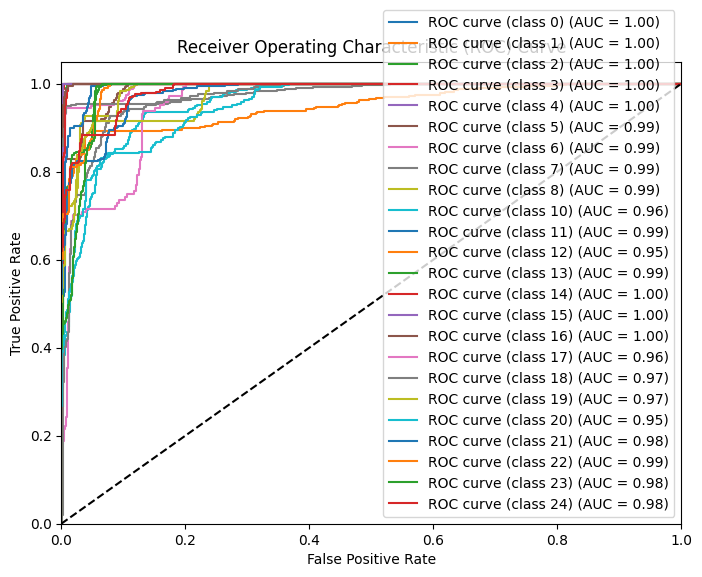

In [36]:
plot_roc(clf, testX.values, test['label'].values,'/content/SVM/ROC.jpg')

In [37]:
import pickle

# save
with open('/content/SVM/svm.pkl','wb') as f:
    pickle.dump(clf,f)

In [40]:
!zip -r ml.zip "/content/Gesture-Recognition-for-Sign-Language"

  adding: content/Gesture-Recognition-for-Sign-Language/ (stored 0%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/ (stored 0%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/amer_sign2.png (deflated 0%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/amer_sign3.png (deflated 4%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/sign_mnist_test.csv (deflated 71%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/sign_mnist_train.csv (deflated 71%)
  adding: content/Gesture-Recognition-for-Sign-Language/data/american_sign_language.PNG (deflated 0%)
  adding: content/Gesture-Recognition-for-Sign-Language/SGD/ (stored 0%)
  adding: content/Gesture-Recognition-for-Sign-Language/SGD/sgd.h5 (deflated 20%)
  adding: content/Gesture-Recognition-for-Sign-Language/SGD/SGD_LOSS.jpg (deflated 36%)
  adding: content/Gesture-Recognition-for-Sign-Language/SGD/.ipynb_checkpoints/ (stored 0%)
  adding: content/Gesture-Recognition-for-Sign-